# Unidad 5: Modelos conexionistas

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Modelos conexionistas
## Introducción a Theano

In [2]:
import theano
import theano.tensor as T

Operaciones básicas con variables en Theano

In [3]:
x = T.scalar('x')
y = x ** 2

y.eval({x : 2})

array(4.)

También es posible realizar operaciones más complejas

In [4]:
x = T.scalar('x')
y = T.scalar('y')
z = 2 * x + 3 * y

z.eval({x: 1, y : 10})

array(32.)

Evaluación mediante funciones 

In [5]:
f = theano.function(inputs=[x, y], outputs = z)
f(1, 2)

array(8.)

In [6]:
x = T.scalar('x')
y = T.scalar('y')

def sum_vars(x, y):
    return x + y

z = sum_vars(x, y)

f = theano.function(inputs = [x, y], outputs = z)
f(1, 2)

array(3.)

In [7]:
x = T.scalar('x')
y = cos(x)

f = theano.function(inputs = [x], outputs = y)

f(0)

array(1.)

In [8]:
x = T.scalar('x')

y = T.switch(T.gt(x, 0), x, -x)

f = theano.function(inputs = [x], outputs = y)

print("abs(3) = ", f(3))
print("abs(-3) = ", f(-3))

abs(3) =  3.0
abs(-3) =  3.0


In [9]:
import time
from theano.ifelse import ifelse

a, b = T.scalars('a', 'b')
x, y = T.matrices('x', 'y')

z_switch = T.switch(T.lt(a, b), T.mean(x), T.mean(y))
z_ifelse = ifelse(T.lt(a, b), T.mean(x), T.mean(y))

f_switch = theano.function([a, b, x, y], z_switch)
f_ifelse = theano.function([a, b, x, y], z_ifelse)

val1 = 0.
val2 = 1.
big_mat = numpy.ones((15000, 15000))

tic = time.clock()
f_switch(val1, val2, big_mat, big_mat)
print('El tiempo utilizando switch es %f' % (time.clock() - tic))

tic = time.clock()
f_ifelse(val1, val2, big_mat, big_mat)
print('El tiempo utilizando switch es %f' % (time.clock() - tic))

El tiempo utilizando switch es 0.692914
El tiempo utilizando switch es 0.293554


In [10]:
x = T.scalar('x')
y = T.scalar('y')

z  = x * y

f = theano.function(inputs = [x, theano.In(y, value = 3)], outputs= z)

print(f(10))
print(f(10, 2))

30.0
20.0


In [11]:
x = theano.shared(np.array(1, dtype = theano.config.floatX))
A = T.scalar()
f = theano.function(inputs = [A], outputs = x, updates = {x: x - A})

print(f(np.array(1)))
print(x.get_value())

1.0
0.0


In [12]:
x = theano.shared(np.array([[1, 2], [3, 4]], dtype = theano.config.floatX))
A = T.matrix()
f = theano.function(inputs = [A], outputs = x, updates = {x: x - A})

print(f(np.array([[1, 1], [1, 1]])))
print(x.get_value())

[[1. 2.]
 [3. 4.]]
[[0. 1.]
 [2. 3.]]


In [13]:
W = T.matrix('W')
v = T.vector('v')
b = T.vector('biases')

x = T.dot(v, W) + b

f = theano.function(inputs = [v, W, b], outputs = x)

f([1,1], [[2,4],[3,5]], [2, 3])

array([ 7., 12.])

In [14]:
x = T.scalar()
y = x**2

# y_grad = dy/dx
y_grad = T.grad(y, x)

# dy/dx = 2 * x
y_grad.eval({x: 10})

array(20.)

Uso de Theano para la estimación de una regresión.

En Theano se puede utilizar el gradiente para implementar una función de coste y realizar una estimación lineal.

In [15]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.50 + 10

X = T.scalar()
Y = T.scalar()

def model(X, w, c):
    return X * w + c

w = theano.shared(np.asarray(0., dtype = theano.config.floatX))
c = theano.shared(np.asarray(0., dtype = theano.config.floatX))
y = model(X, w, c)

cost     = T.mean(T.sqr(y - Y))
gradient_w = T.grad(cost = cost, wrt = w)
gradient_c = T.grad(cost = cost, wrt = c)
updates  = [[w, w - gradient_w * 0.01], [c, c - gradient_c * 0.01]]

train = theano.function(inputs = [X, Y], outputs = cost, updates = updates)

for i in range(15):
    for x, y in zip(trX, trY):
        cost_i = train(x, y)
    print('En el paso', i, 'el valor de w es', w.get_value(),
           'y c es', c.get_value(), 'con un coste', cost_i)

En el paso 0 el valor de w es -0.8565664398722816 y c es 9.776791416818293 con un coste 10.055249998828824
En el paso 1 el valor de w es 0.33670918129732047 y c es 10.515120898692238 con un coste 1.3430788082883007
En el paso 2 el valor de w es 1.1462745823446208 y c es 10.354309158862362 con un coste 0.23341238045348742
En el paso 3 el valor de w es 1.5815942013425457 y c es 10.205216596745913 con un coste 0.03421557375299153
En el paso 4 el valor de w es 1.8048935933577694 y c es 10.121262009483482 con un coste 0.0015859257769192715
En el paso 5 el valor de w es 1.918148943289178 y c es 10.077745217380954 con un coste 0.0010771948992728678
En el paso 6 el valor de w es 1.9754298818742597 y c es 10.055617353645387 con un coste 0.004821696082370686
En el paso 7 el valor de w es 2.004380357063588 y c es 10.04441862775099 con un coste 0.00773165663417488
En el paso 8 el valor de w es 2.0190096865337934 y c es 10.038757748219613 con un coste 0.009461837047187185
En el paso 9 el valor de w

## Implementación de un perceptrón con Theano

En primer lugar vamos a definir una red neuronal que toma las entradas y utiliza los pesos para determinar la salida. Inicialmente definidos una neurona que calcula la salida `a`. La representación se puede observar en la siguiente figura

![Modelo red neuronal](U5_Modelo.001.png)

donde el vector $x$ es $[x_1, x_2]$ y $w$ es$[w_1, w_2]$.

In [16]:
# Definición de las variables simbólicas
x = T.vector('x')

# Definición de las variables compartidas
w = theano.shared(np.array([1, 1], dtype = theano.config.floatX))
b = theano.shared(-1.5)

# Definición de la neurona
z = T.dot(x, w) + b
a = T.switch(T.lt(z, 0), 0, 1)

# Conjunto de datos
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]

# Creación de la función
neuron = theano.function([x], a)

# Iteramos sobre todas las entradas
for i in range(len(inputs)):
    t = inputs[i]
    out = neuron(t)
    print('El resultado para [%d, %d] es %d' % (t[0], t[1], out))

El resultado para [0, 0] es 0
El resultado para [0, 1] es 0
El resultado para [1, 0] es 0
El resultado para [1, 1] es 1


Se puede observar que los resultados son los mismos en ambos casos.

# Propagación hacia atrás
Ahora es necesario modificar el código anterior para introducir la función de error y entrenar la red neuronal.

In [17]:
# Definición de las variables simbólicas
x = T.matrix('x')
w = theano.shared(np.array([1, 1], dtype = theano.config.floatX))
b = theano.shared(1.0)
learning_rate = 0.01

# Definición de la neurona
z = T.dot(x, w) + b
a = 1 / (1 + T.exp(-z))

# Definición de la función de coste
a_hat = T.vector('a_hat')
cost = -(a_hat * T.log(a) + (1 - a_hat) * T.log(1 - a)).sum()

# Gradiente de la función de coste
dw, db = T.grad(cost, [w, b])

train = theano.function(
    inputs = [x, a_hat],
    outputs = [a, cost],
    updates = [[w, w - learning_rate * dw], [b, b - learning_rate * db]])

En este caso se han introducido unos cambios respecto a la implementación anterior. En primer lugar, se ha definido `x` como una matriz en lugar de un vector. Esto es para tener un enfoque vectorizado en donde se determinan todos los resultados de forma conjunta y se puede obtener los costes necesarios para implementar los gradientes. Por otro lado, se ha cambiado la forma de la neurona, `a`, de una función escalón a una función logística.

También se ha de tener en cuenta que se va a utilizar el gradiente descendiente para obtener los pesos por lotes, es decir, usaremos todas las observaciones de entrenamiento para actualizar los pesos.

Los resultados de la red son:
El resultado para [0, 0] es 0.00
El resultado para [0, 1] es 0.05
El resultado para [1, 0] es 0.05
El resultado para [1, 1] es 0.93
El vector w es [5.58, 5.58]
El valor del bias es -8.55


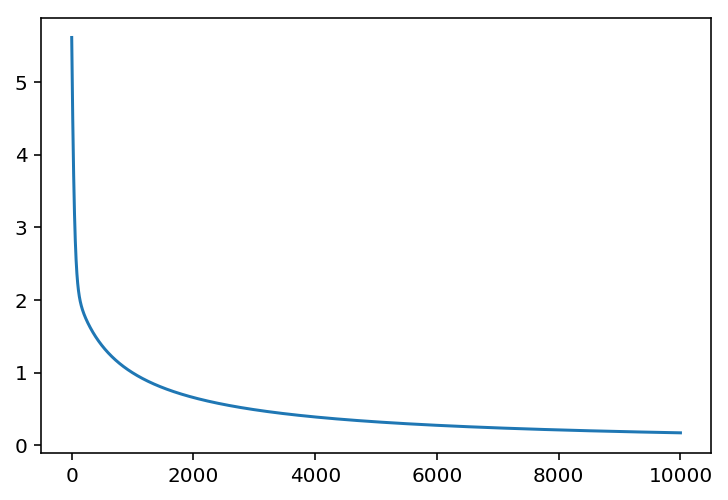

In [18]:
# Conjunto de datos de entrenamiento
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [0,0,0,1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(10000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print('Los resultados de la red son:')
for i in range(len(inputs)):
    print('El resultado para [%d, %d] es %.2f' % (inputs[i][0], inputs[i][1], pred[i]))
    
# Resultados
print
print('El vector w es [%.2f, %.2f]' % (w.get_value()[0], w.get_value()[0]))
print('El valor del bias es %.2f' % b.get_value())

# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)

En este ejemplo se puede ver como tras el entrenamiento la red neuronal puede reproducir los resultados deseados.

## Red neuronal con dos capas
Ahora vamos a implementar una red neuronal con dos capas. En la primera capa vamos a utilizar dos neuronas y en la segunda tres. Con esta red neuronal se va a entrenar para poder reproducir una función `XNOR` los siguientes resultados:

X1 | X2 | out
-- | -- | --
0 | 0 | 1
0 | 1 | 0
1 | 0 | 0
1 | 1 | 1

Una representación de esta red neuronal se puede observar en la siguiente figura

![Modelo red neuronal](U5_Modelo.002.png)

donde el vector $x$ es $[x_1, x_2]$, $w_1$ es$[w_{11}, w_{12}]$, $w_2$ es$[w_{21}, w_{22}]$ y $w_3$ es$[w_{31}, w_{32}]$.

En primer lugar se definen las variables

In [19]:
x = T.matrix('x')
w1 = theano.shared(np.array([.1, .2], dtype = theano.config.floatX))
w2 = theano.shared(np.array([.3, .4], dtype = theano.config.floatX))
w3 = theano.shared(np.array([.5, .6], dtype = theano.config.floatX))
b1 = theano.shared(1.)
b2 = theano.shared(1.)
learning_rate = 0.01

En segundo lugar se han de definir las neuronas y la relación entre las mismas.

In [20]:
a1 = 1 / (1 + T.exp(-T.dot(x, w1) - b1))
a2 = 1 / (1 + T.exp(-T.dot(x, w2) - b1))
x2 = T.stack([a1, a2], axis = 1)
a3 = 1 / (1 + T.exp(-T.dot(x2, w3) - b2))

Posteriormente se ha de definir la función para el entrenamiento de la red. Esto se hace utilizando la función de coste y el gradiente.

In [21]:
a_hat = T.vector('a_hat')
cost = -(a_hat * T.log(a3) + (1 - a_hat) * T.log(1 - a3)).sum()
dw1, dw2, dw3, db1, db2 = T.grad(cost, [w1, w2, w3, b1, b2])

train = theano.function(
    inputs = [x,a_hat],
    outputs = [a3,cost],
    updates = [
        [w1, w1 - learning_rate * dw1],
        [w2, w2 - learning_rate * dw2],
        [w3, w3 - learning_rate * dw3],
        [b1, b1 - learning_rate * db1],
        [b2, b2 - learning_rate * db2]
    ]
)

Finalmente, se puede realizar al entrenamiento de la red neuronal.

Los resultados de la red son:
El resultado para [0, 0] es 0.99
El resultado para [0, 1] es 0.01
El resultado para [1, 0] es 0.01
El resultado para [1, 1] es 0.99
El vector w1 es [4.17, 4.17]
El vector w2 es [9.55, 9.55]
El vector w3 es [12.83, 12.83]
El valor del bias 1 es -6.25
El valor del bias 2 es 4.64


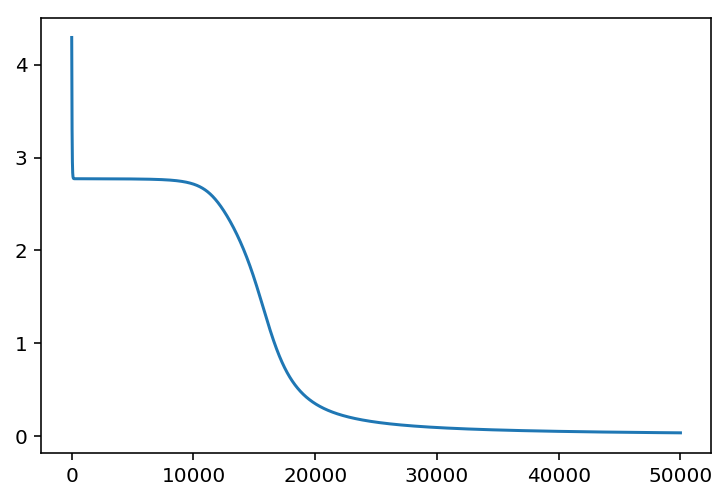

In [22]:
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [1, 0, 0, 1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(50000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print('Los resultados de la red son:')
for i in range(len(inputs)):
    print('El resultado para [%d, %d] es %.2f' % (inputs[i][0], inputs[i][1], pred[i]))

# Resultados
print
print('El vector w1 es [%.2f, %.2f]' % (w1.get_value()[0], w1.get_value()[0]))
print('El vector w2 es [%.2f, %.2f]' % (w2.get_value()[0], w2.get_value()[0]))
print('El vector w3 es [%.2f, %.2f]' % (w3.get_value()[0], w3.get_value()[0]))
print('El valor del bias 1 es %.2f' % b1.get_value())
print('El valor del bias 2 es %.2f' % b2.get_value())

# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)

En la figura se puede observar que es hay una reducción de la función de esfuerzo después de 20000 iteraciones. Por lo que en este caso ha sido necesario aumentar el tiempo de entrenamiento respecto a ejemplo anterior.

En este ejemplo, al igual que el anterior, se puede ver como tras el entrenamiento la red neuronal puede reproducir los resultados deseados.

In [23]:
def floatX(X):
    return np.asarray(X, dtype = theano.config.floatX)

def init_weights(shape):
    return theano.shared(floatX(np.random.randn(*shape) * 0.01))

In [24]:
# Semilla
rng = np.random.RandomState(1)

# Bias
b1 = theano.shared(1.)
b2 = theano.shared(1.)

# Pesos iniciales aleatorios
w1 = init_weights((2, 3))
w2 = init_weights((3, 1))

# Definición de la red
a1 = T.nnet.sigmoid(T.dot(x, w1) + b1)
a2 = T.nnet.sigmoid(T.dot(a1, w2) + b2)
a3 = T.flatten(a2)

# Función de esfuerzo
cost = T.nnet.binary_crossentropy(a3, a_hat).mean()

# Función de entrenamiento
train = theano.function(inputs = [x, a_hat],
                        outputs = [a3, cost],
                        updates = [
                            (w1, w1 - learning_rate * T.grad(cost, w1)),
                            (w2, w2 - learning_rate * T.grad(cost, w2)),
                            (b1, b1 - learning_rate * T.grad(cost, b1)),
                            (b2, b2 - learning_rate * T.grad(cost, b2))
                        ])

Los resultados de la red son:
El resultado para [0, 0] es 0.99
El resultado para [0, 1] es 0.01
El resultado para [1, 0] es 0.01
El resultado para [1, 1] es 0.99


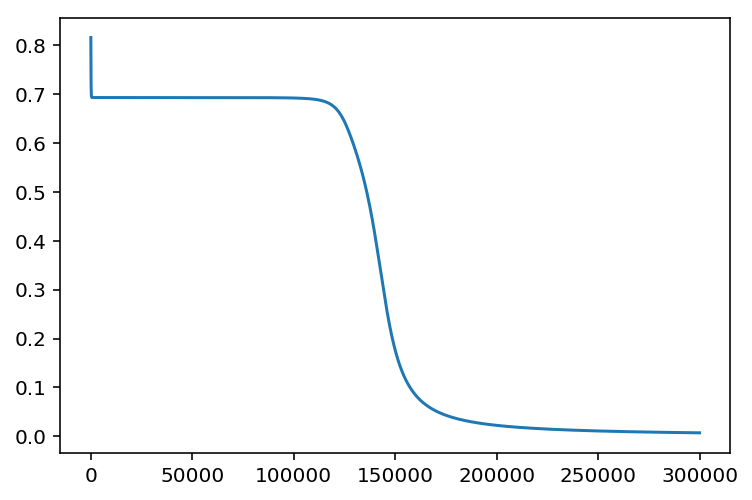

In [25]:
learning_rate = 0.1

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [1, 0, 0, 1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(300000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print('Los resultados de la red son:')
for i in range(len(inputs)):
    print('El resultado para [%d, %d] es %.2f' % (inputs[i][0], inputs[i][1], pred[i]))

# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)

### Redes neuronales

In [26]:
import os

datasets_dir = ''

def one_hot(x,n):
    if type(x) == list:
        x = np.array(x)
    x = x.flatten()
    o_h = np.zeros((len(x),n))
    o_h[np.arange(len(x)),x] = 1
    return o_h

def mnist(ntrain=60000,ntest=10000,onehot=True):
    data_dir = os.path.join(datasets_dir,'mnist/')
    fd = open(os.path.join(data_dir,'train-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    trX = loaded[16:].reshape((60000,28*28)).astype(float)

    fd = open(os.path.join(data_dir,'train-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    trY = loaded[8:].reshape((60000))

    fd = open(os.path.join(data_dir,'t10k-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    teX = loaded[16:].reshape((10000,28*28)).astype(float)

    fd = open(os.path.join(data_dir,'t10k-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    teY = loaded[8:].reshape((10000))

    trX = trX/255.
    teX = teX/255.

    trX = trX[:ntrain]
    trY = trY[:ntrain]

    teX = teX[:ntest]
    teY = teY[:ntest]

    if onehot:
        trY = one_hot(trY, 10)
        teY = one_hot(teY, 10)
    else:
        trY = np.asarray(trY)
        teY = np.asarray(teY)

    return trX,teX,trY,teY

trX, teX, trY, teY = mnist()

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


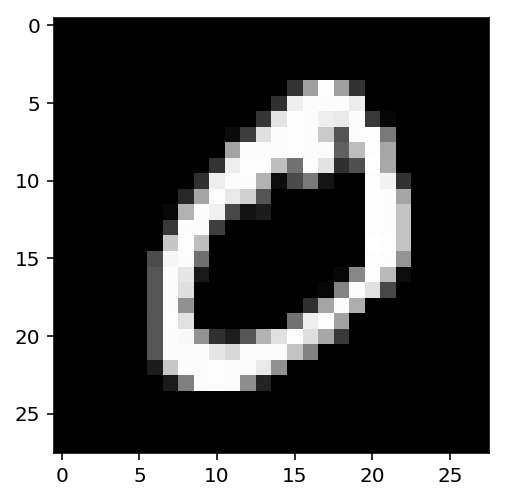

In [27]:
print(trY[1,:])
imshow(trX[1,:].reshape(28, 28), cmap = mpl.cm.gray)
show()

In [28]:
num_iter = 25

In [29]:
trX, teX, trY, teY = mnist()

X = T.fmatrix()
Y = T.fmatrix()

w = init_weights((784, 10))

py_x = T.nnet.sigmoid(T.dot(X, w))

y_pred = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
gradient = T.grad(cost, w)
update = [[w, w - gradient * 0.1]]

train = theano.function(inputs = [X, Y],
                        outputs = cost,
                        updates = update,
                        allow_input_downcast=True)
predict = theano.function(inputs = [X],
                          outputs = y_pred,
                          allow_input_downcast = True)

for i in range(num_iter):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print(i, np.mean(np.argmax(teY, axis=1) == predict(teX)), cost)

0 0.7188 0.002708556596708421
1 0.6994 0.0012358971245930133
2 0.6889 0.0007817157465780501
3 0.6837 0.0005649837539767377
4 0.6783 0.0004392463858975025
5 0.6742 0.0003576001559729881
6 0.6703 0.00030053012754027795
7 0.6675 0.0002585069162024383
8 0.6653 0.00022633987705063187
9 0.6635 0.00020096695959936838
10 0.6621 0.0001804683197748729
11 0.6607 0.00016358087745368716
12 0.6598 0.00014944055265054545
13 0.6587 0.00013743680364435452
14 0.6568 0.0001271263332358832
15 0.6558 0.00011817971074951361
16 0.6546 0.00011034716106144433
17 0.6534 0.0001034359578881165
18 0.6529 9.729508281897585e-05
19 0.6515 9.180456905512955e-05
20 0.6506 8.68679447021198e-05
21 0.6492 8.240677439478945e-05
22 0.6482 7.835665082796205e-05
23 0.6476 7.466420679416971e-05
24 0.6466 7.12848575395553e-05


In [30]:
w = init_weights((784, 10))

py_x = T.nnet.softmax(T.dot(X, w))

y_pred = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
gradient = T.grad(cost, w)
update = [[w, w - gradient * 0.1]]

train = theano.function(inputs = [X, Y],
                        outputs = cost,
                        updates = update,
                        allow_input_downcast = True)
predict = theano.function(inputs = [X],
                          outputs = y_pred,
                          allow_input_downcast = True)

for i in range(num_iter):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print(i, np.mean(np.argmax(teY, axis=1) == predict(teX)), cost)

0 0.8965 0.14193895447710597
1 0.9075 0.11220315382106459
2 0.9113 0.10013726335827661
3 0.9136 0.09319014481032867
4 0.9155 0.08855211110795991
5 0.9166 0.08519006857006639
6 0.9179 0.08262147293856117
7 0.9183 0.08058590197237205
8 0.9192 0.07892843935508581
9 0.9192 0.07755025838550315
10 0.9199 0.0763849187013012
11 0.9201 0.07538589395438548
12 0.92 0.0745195211407721
13 0.9205 0.07376078157307732
14 0.9202 0.0730906575613057
15 0.9207 0.07249441254413588
16 0.9215 0.07196043611483804
17 0.9218 0.07147944723742387
18 0.9217 0.07104393161242797
19 0.922 0.07064773617411316
20 0.9222 0.0702857714763697
21 0.9222 0.06995378967270088
22 0.9219 0.0696482164325075
23 0.9219 0.06936602197802176
24 0.9219 0.06910462092410494


In [31]:
w_h = init_weights((784, 625))
w_o = init_weights((625, 10))

h = T.nnet.sigmoid(T.dot(X, w_h))
py_x = T.nnet.softmax(T.dot(h, w_o))
y_x = T.argmax(py_x, axis = 1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
updates = [[w_h, w_h - T.grad(cost, w_h) * 0.1],
          [w_o, w_o - T.grad(cost, w_o) * 0.1] ]

train = theano.function(inputs = [X, Y], 
                        outputs = cost,
                        updates = updates,
                        allow_input_downcast = True)
predict = theano.function(inputs = [X],
                          outputs = y_x,
                          allow_input_downcast = True)

for i in range(num_iter):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print(i, np.mean(np.argmax(teY, axis=1) == predict(teX)), cost)

0 0.822 0.36237293068358867
1 0.8769 0.1487148933685556
2 0.8906 0.11207233636488068
3 0.8979 0.09724282065219587
4 0.9046 0.08846025802792229
5 0.9074 0.08219776029699377
6 0.9096 0.07733012579105723
7 0.9121 0.07339573641009677
8 0.9132 0.07015012513201556
9 0.9141 0.06743525248980646
10 0.9147 0.0651365631701975
11 0.9166 0.06316616629606801
12 0.9178 0.06145484581288914
13 0.9189 0.059947607103372276
14 0.9209 0.058600807210855935
15 0.922 0.05737997909583032
16 0.923 0.05625793412748917
17 0.9245 0.055213062319514596
18 0.9251 0.054227950218341495
19 0.9261 0.053288416354056345
20 0.9275 0.052382907640037266
21 0.9284 0.05150209129022346
22 0.9296 0.05063848709300385
23 0.9313 0.04978606694498774
24 0.9334 0.048939853922080875


## Dropout

In [32]:
from theano.sandbox.rng_mrg import MRG_RandomStreams

srng = MRG_RandomStreams()

def dropout(X, p):
    if p > 0:
        X *= srng.binomial(X.shape, p = 1 - p, dtype = theano.config.floatX)
        X /= 1 - p
    return X

def model(X, w_h, w_o, p_drop):
    X = dropout(X, p_drop)
    h = T.nnet.sigmoid(T.dot(X, w_h))
    
    h = dropout(h, p_drop)
    py_x = T.nnet.softmax(T.dot(h, w_o))

    return h, py_x

In [33]:
w_h = init_weights((784, 625))
w_o = init_weights((625, 10))

# Modelo de entrenamiento
h, py_x = model(X, w_h, w_o, 0.05)
y_x = T.argmax(py_x, axis = 1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
updates = [[w_h, w_h - T.grad(cost, w_h) * 0.1],
          [w_o, w_o - T.grad(cost, w_o) * 0.1] ]

train = theano.function(inputs = [X, Y], 
                        outputs = cost,
                        updates = updates,
                        allow_input_downcast = True)

# Modelo para evaluación, con p == 0
h_predict, py_predict = model(X, w_h, w_o, 0.0)
y_predict = T.argmax(py_predict, axis = 1)

predict = theano.function(inputs = [X],
                          outputs = y_predict,
                          allow_input_downcast = True)

# Evaluación del modelo
for i in range(num_iter):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print(i, np.mean(np.argmax(teY, axis=1) == predict(teX)), cost)

0 0.8219 0.3957172903715575
1 0.8755 0.165488962604108
2 0.8912 0.1220340771336103
3 0.8996 0.10316331464621897
4 0.9034 0.10217439540896484
5 0.9078 0.09282362251902303
6 0.9104 0.08441324633695113
7 0.912 0.08075749585735027
8 0.9146 0.08546835709820888
9 0.9147 0.08424738792736222
10 0.917 0.08135180798877242
11 0.9186 0.07245332251946798
12 0.9193 0.07664166731653027
13 0.9212 0.08299408781345964
14 0.9225 0.058104698419134536
15 0.9237 0.07545332401788238
16 0.9257 0.07843800839249337
17 0.9271 0.0579392586601969
18 0.9282 0.06447326420822277
19 0.929 0.059603087653436096
20 0.9309 0.06879348352260149
21 0.9326 0.06578585420047688
22 0.9338 0.048861316067085395
23 0.9354 0.06026484407069606
24 0.9365 0.04559941733149473
